<a href="https://colab.research.google.com/github/2003MADHAV/Deeplearning_project_beased_experiments-/blob/main/003_Implementing_a_single_layer_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries and dataset
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# We will be using make_circles from scikit-learn
from sklearn.datasets import make_circles

SEED = 2017

In [ ]:
# First, we need to create the training data
# We create an inner and outer circle

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2017)
outer = y == 0
inner = y == 1

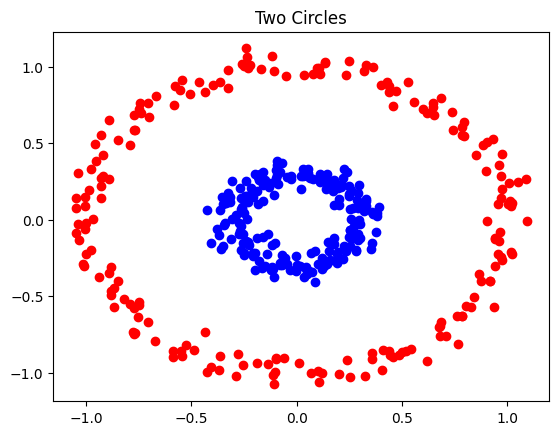

In [ ]:
# Let's plot the data to show the two classes

plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

# Example of non-linearly separable data

In [ ]:
# We normalize the data to make sure the center of both circles is (1,1)

X = X+1

In [ ]:
# To determine the performance of our algorithm we split our data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
# A linear activation function won't work in this case, so we'll be using a sigmoid function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Next, we define the hyperparameters

n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1

In [ ]:
# Initialize the weights and other variables

# Initialise weights
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []
print(weights_hidden)
print(weights_output)

[[-8.92341923e-01 -6.33455039e-01  3.58107407e-01  1.38350898e+00
   7.25468854e-02  7.00369586e-01 -6.08927556e-01  1.22013677e+00
   1.46231583e+00  1.11353501e+00  3.01375796e-01 -1.20995156e+00
   8.88601646e-01  9.76104487e-01  1.11128156e+00  4.45962725e-01
  -9.18077388e-01  1.66684854e-02 -3.64936674e-01 -5.24114430e-02
  -4.80765890e-02  1.36961113e+00 -3.09427695e-01  8.07354930e-01
  -1.17538014e+00 -3.05391667e-02 -6.96871215e-01 -1.05103775e+00
   1.61407103e+00  8.11239340e-01  4.06795533e-01  7.72397283e-01
  -4.10925305e-01  2.63704542e-01  1.32863205e+00 -1.31736871e+00
   9.35768958e-01  4.82751821e-01 -8.57059202e-01 -2.07021293e-01
  -5.57381943e-01 -5.42035636e-02  2.46804773e+00 -1.36662096e+00
   4.37192234e-01 -1.85731206e+00 -3.91379421e-01 -9.16740121e-01
   1.81869967e+00  1.00628371e+00]
 [ 7.04655303e-01  1.49666246e-02  6.77227367e-01 -7.86411655e-01
  -3.26036160e-01  9.50986176e-01 -7.81772311e-01  1.40672742e+00
   5.63475743e-01  1.42213299e+00 -1.1164

In [ ]:
# Run the single-layer neural network and output the statistics

for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        # Forward computations
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))

        # Backward computations
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]

    # Update weights
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]

    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        hidden_output = sigmoid(np.dot(X_val, weights_hidden))
        out = sigmoid(np.dot(hidden_output, weights_output))
        loss = np.mean((out - y_val) ** 2)
        # Final prediction is based on a threshold of 0.5
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ", '{:>4}'.format(e),
            "; Validation loss: ", '{:>6}'.format(loss.round(4)),
            "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

Epoch:     0 ; Validation loss:  0.2865 ; Validation accuracy:  0.4875
Epoch:   100 ; Validation loss:   0.212 ; Validation accuracy:     0.8
Epoch:   200 ; Validation loss:  0.1756 ; Validation accuracy:  0.8375
Epoch:   300 ; Validation loss:  0.1452 ; Validation accuracy:    0.85
Epoch:   400 ; Validation loss:  0.1219 ; Validation accuracy:  0.8625
Epoch:   500 ; Validation loss:  0.1045 ; Validation accuracy:  0.9125
Epoch:   600 ; Validation loss:  0.0912 ; Validation accuracy:  0.9375
Epoch:   700 ; Validation loss:  0.0811 ; Validation accuracy:   0.975
Epoch:   800 ; Validation loss:   0.073 ; Validation accuracy:     1.0
Epoch:   900 ; Validation loss:  0.0665 ; Validation accuracy:     1.0
